<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/XGB_clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost Classifier

In [49]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("bank-additional-full.csv", sep=";")

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.columns[df.dtypes == 'object']

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [16]:
df1 = pd.get_dummies(df,df.columns[df.dtypes == 'object'], drop_first=True)

In [17]:
df1.dtypes

age                                int64
duration                           int64
campaign                           int64
pdays                              int64
previous                           int64
emp.var.rate                     float64
cons.price.idx                   float64
cons.conf.idx                    float64
euribor3m                        float64
nr.employed                      float64
job_blue-collar                    uint8
job_entrepreneur                   uint8
job_housemaid                      uint8
job_management                     uint8
job_retired                        uint8
job_self-employed                  uint8
job_services                       uint8
job_student                        uint8
job_technician                     uint8
job_unemployed                     uint8
job_unknown                        uint8
marital_married                    uint8
marital_single                     uint8
marital_unknown                    uint8
education_basic.

In [21]:
X = df1.drop(columns=['y_yes'], axis=1)
y = df1['y_yes']

In [22]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2)

In [24]:
dtree_clf = DecisionTreeClassifier()

In [26]:
dtree_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
pred_dtree = dtree_clf.predict(X_test)

In [30]:
pred_dtree

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [40]:
accuracy_score(y_test, pred_dtree)

0.890507404709881

In [39]:
print('Model accuracy:', classification_report(y_test, pred_dtree))

Model accuracy:               precision    recall  f1-score   support

           0       0.94      0.94      0.94      7308
           1       0.51      0.54      0.53       930

    accuracy                           0.89      8238
   macro avg       0.73      0.74      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [42]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_dtree)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree')

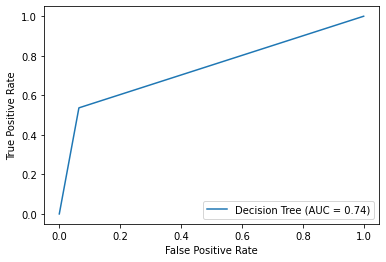

In [45]:
display.plot();

In [48]:
cm = confusion_matrix(y_test, pred_dtree, labels=dtree_clf.classes_)

In [51]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtree_clf.classes_)

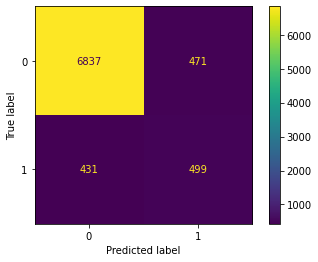

In [53]:
disp.plot();

## XGBoost Classifier

In [55]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier()

In [56]:
xgb_preds = xgb_clf.predict(X_test)

In [57]:
xgb_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [64]:
print('Model accuracy:', classification_report(y_test, xgb_preds))

Model accuracy:               precision    recall  f1-score   support

           0       0.94      0.97      0.95      7308
           1       0.68      0.50      0.58       930

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



In [59]:
xfpr, xtpr, xthresholds = metrics.roc_curve(y_test, xgb_preds)
xroc_auc = metrics.auc(xfpr, xtpr)
xdisplay = metrics.RocCurveDisplay(fpr=xfpr, tpr=xtpr, roc_auc=xroc_auc, estimator_name='XGBoost')

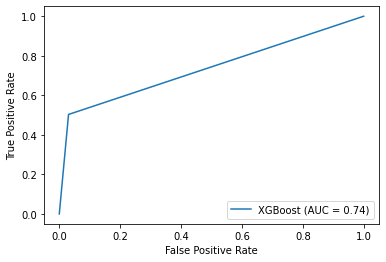

In [60]:
xdisplay.plot();

In [61]:
xcm = confusion_matrix(y_test, xgb_preds, labels=xgb_clf.classes_)

In [62]:
xdisp = ConfusionMatrixDisplay(confusion_matrix=xcm, display_labels=xgb_clf.classes_)

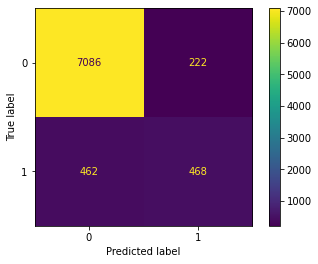

In [63]:
xdisp.plot();